In [1]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv("km0iloobr6plqesn.csv")
df.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
0,20210104,4:00:00.023542378,P,MSFT,NaN,@ T,113,222.75,0,1166,1,N,NaN
1,20210104,4:00:00.090034216,P,MSFT,NaN,@FTI,50,222.88,0,1206,2,N,NaN
2,20210104,4:00:00.179318250,P,MSFT,NaN,@ TI,50,222.88,0,1207,3,N,NaN
3,20210104,4:00:00.284123445,P,MSFT,NaN,@ TI,2,223.00,0,1211,4,N,NaN
4,20210104,4:00:00.284123610,P,MSFT,NaN,@ TI,2,223.00,0,1212,5,N,NaN


In [3]:
df = df[['DATE', 'TIME_M', 'SIZE', 'PRICE']]
df.head()

,DATE,TIME_M,SIZE,PRICE
0,20210104,4:00:00.023542378,113,222.75
1,20210104,4:00:00.090034216,50,222.88
2,20210104,4:00:00.179318250,50,222.88
3,20210104,4:00:00.284123445,2,223.00
4,20210104,4:00:00.284123610,2,223.00


In [4]:
df['datetime'] = pd.to_datetime(df['DATE'].astype(str) + df['TIME_M'], format='%Y%m%d%H:%M:%S.%f')

In [5]:
df.set_index('datetime', inplace=True)
df.head()

,DATE,TIME_M,SIZE,PRICE
datetime,,,,
2021-01-04 04:00:00.023542378,20210104,4:00:00.023542378,113,222.75
2021-01-04 04:00:00.090034216,20210104,4:00:00.090034216,50,222.88
2021-01-04 04:00:00.179318250,20210104,4:00:00.179318250,50,222.88
2021-01-04 04:00:00.284123445,20210104,4:00:00.284123445,2,223.00
2021-01-04 04:00:00.284123610,20210104,4:00:00.284123610,2,223.00


In [6]:
df = df[['SIZE', 'PRICE']]
df.head()

,SIZE,PRICE
datetime,,
2021-01-04 04:00:00.023542378,113,222.75
2021-01-04 04:00:00.090034216,50,222.88
2021-01-04 04:00:00.179318250,50,222.88
2021-01-04 04:00:00.284123445,2,223.00
2021-01-04 04:00:00.284123610,2,223.00


In [54]:
df = df.assign(num_trades=1)
df.head()

,SIZE,PRICE,num_trades
datetime,,,
2021-01-04 04:00:00.023542378,113,222.75,1
2021-01-04 04:00:00.090034216,50,222.88,1
2021-01-04 04:00:00.179318250,50,222.88,1
2021-01-04 04:00:00.284123445,2,223.00,1
2021-01-04 04:00:00.284123610,2,223.00,1


In [55]:
df_2 = df.resample('2s').sum()
df_2.head()

,SIZE,PRICE,num_trades
datetime,,,
2021-01-04 04:00:00,217,1114.51,5
2021-01-04 04:00:02,0,0.00,0
2021-01-04 04:00:04,0,0.00,0
2021-01-04 04:00:06,0,0.00,0
2021-01-04 04:00:08,0,0.00,0


In [56]:
df_2['PRICE'] = df_2['PRICE']/df_2['num_trades']
df_2.head()

,SIZE,PRICE,num_trades
datetime,,,
2021-01-04 04:00:00,217,222.902,5
2021-01-04 04:00:02,0,NaN,0
2021-01-04 04:00:04,0,NaN,0
2021-01-04 04:00:06,0,NaN,0
2021-01-04 04:00:08,0,NaN,0


<AxesSubplot:xlabel='datetime'>

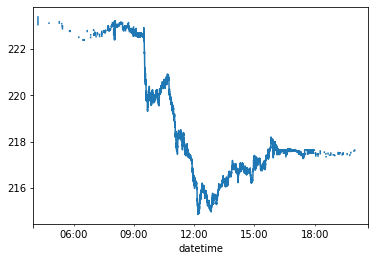

In [57]:
df_2[:30000].PRICE.plot()

In [58]:
df_2['log_return'] = np.log(df_2['PRICE']/df_2['PRICE'].shift())

In [59]:
df_2['vol'] = df_2['log_return'].rolling(100).std()
df_2.head()

,SIZE,PRICE,num_trades,log_return,vol
datetime,,,,,
2021-01-04 04:00:00,217,222.902,5,NaN,NaN
2021-01-04 04:00:02,0,NaN,0,NaN,NaN
2021-01-04 04:00:04,0,NaN,0,NaN,NaN
2021-01-04 04:00:06,0,NaN,0,NaN,NaN
2021-01-04 04:00:08,0,NaN,0,NaN,NaN


<AxesSubplot:xlabel='datetime'>

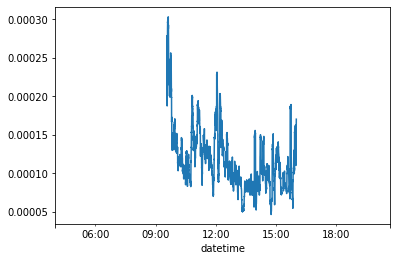

In [60]:
df_2[:30000].vol.plot()

In [61]:
len(df_2)

7675200

In [62]:
df_2['PRICE'] = (df_2.PRICE - df_2.PRICE.mean())/df_2.PRICE.std(ddof=0)
df_2['SIZE'] = (df_2.SIZE - df_2.SIZE.mean())/df_2.SIZE.std(ddof=0)
df_2['vol'] = (df_2.vol - df_2.vol.mean())/df_2.vol.std(ddof=0)
df_2 = df_2[['PRICE', 'SIZE', 'vol']]
df_2.head()

,PRICE,SIZE,vol
datetime,,,
2021-01-04 04:00:00,-1.473138,-0.009929,NaN
2021-01-04 04:00:02,NaN,-0.017278,NaN
2021-01-04 04:00:04,NaN,-0.017278,NaN
2021-01-04 04:00:06,NaN,-0.017278,NaN
2021-01-04 04:00:08,NaN,-0.017278,NaN


In [63]:
df_2.to_csv('2sec_normed.csv')

In [64]:
len(df_2)

7675200

In [69]:
horizon=50
df_2['vol_horizon'] = df_2.vol.shift(periods=-horizon)
df_2['PRICE_horizon'] = df_2.PRICE.shift(periods=-horizon)
df_2.head()

,PRICE,SIZE,vol,vol_horizon,PRICE_horizon
datetime,,,,,
2021-01-04 04:00:00,-1.473138,-0.009929,NaN,NaN,NaN
2021-01-04 04:00:02,NaN,-0.017278,NaN,NaN,NaN
2021-01-04 04:00:04,NaN,-0.017278,NaN,NaN,NaN
2021-01-04 04:00:06,NaN,-0.017278,NaN,NaN,NaN
2021-01-04 04:00:08,NaN,-0.017278,NaN,NaN,NaN


In [70]:
df_no_na = df_2.dropna()
df_no_na.head()

,PRICE,SIZE,vol,vol_horizon,PRICE_horizon
datetime,,,,,
2021-01-04 09:33:18,-1.600373,0.031560,1.578028,1.201022,-1.633002
2021-01-04 09:33:20,-1.600808,0.116197,1.558087,1.278450,-1.622771
2021-01-04 09:33:22,-1.602416,0.149998,1.555718,1.401211,-1.637178
2021-01-04 09:33:24,-1.603306,0.198871,1.519604,1.411726,-1.642106
2021-01-04 09:33:26,-1.609564,0.144241,1.535405,1.440105,-1.649906


In [71]:
len(df_no_na)

1045974

In [72]:
df_no_na.to_csv('2sec_50horizon.csv')